## Standardize the data
It is important to standardize the data in order to make sure all the data is on the same scale 

## Preprocessing and PCA in R

For some of the preprocessing , I preprocessed the data in r because I found it a little easier. For some columns there were missing or incorrect values. For example duration_ms variable had -1 in it to indicate that . I removed those values and instead of about 50k samples, i have 40k samples which is still a lot. 

Since there are a lot of variables to choose from and i only want two because otherwise it will be hard/impossible to visualize i decided to run a PCA.R  has a lot of great libraries for running a PCA so I ran a PCA in R and chose two variables with the PCA in mind using these two graphs:

![alternative text](Rplot.png)


Its also important to make sure that these values have significance and which values have significance

![alternative text](contbarplotdim1.png)
![alternative text](contbarplotdim2.png)

## Load the data Set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#import the dataframe
df = pd.read_csv(r'music_genre5.csv')
df.describe()

## Standardize the data

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = list(df.loc[:,'popularity':].columns)

x1 = df.sample(n=1000) #get a number of samples

x = x1.loc[:, features]

X = StandardScaler().fit_transform(x)

x_pand = pd.DataFrame(X)

x_pand['music_genres'] = x1["music_genre"].values

data = pd.DataFrame()

#negative correltiona

data['Acousticness'] = x_pand.iloc[:,1]
data['Energy'] = x_pand.iloc[:,4]

#X = data.values

# dance_instru = pd.DataFrame()

# dance_instru['Danceability']= x_pand.iloc[:,2]
# dance_instru['Instrumentalness']= x_pand.iloc[:,5]

#no correlation variavbles

# acoust_dance = pd.DataFrame()

# acoust_dance['acousticness']= x_pand.iloc[:,1]
# acoust_dance['Danceability']= x_pand.iloc[:,5]




#0 popularity
#1 acousticness *
#2 danceability $
#3 duration_ms
#4 energy *
#5 instrummentalness $
#6 liveness
#7 loudness
#8 speechiness 
#9 tempo


# type(X)

# X.shape
# x.shape



## run the PCA on standardized data and save the components

In [107]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(X)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

prin_comp = pd.DataFrame(data = pca_2_result, columns = ['principal component 1', 'principal component 2'])



copyPCA = prin_comp.copy()
copyPCA['genres'] = x1['music_genre'].values

X = pca_2_result

copyPCA

Explained variation per principal component: [0.35422009 0.13178101]


,principal component 1,principal component 2,genres
0,-0.612254,-0.673774,Country
1,0.004362,1.116081,Alternative
2,-2.012926,-2.287576,Rap
3,-0.969818,-1.005702,Country
4,-1.174406,-0.911991,Rock
...,...,...,...
995,-1.122686,-1.559352,Rap
996,0.331477,1.645302,Classical
997,-0.112135,1.451961,Electronic
998,0.077754,0.744729,Anime


## Formula for the cost

In [108]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

## Formula for k means algorithim

In [109]:
def kmeans1(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = data.sample(n=k).values
  while diff:
     # for each observation
     for i, row in enumerate(X):
         mn_dist = float('inf')
        # dist of the point from all centroids
         for idx, centroid in enumerate(centroids):
            d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            # store closest centroid
            if mn_dist > d:
               mn_dist = d
               cluster[i] = idx
     new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     # if centroids are same then leave
     if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
     else:
        centroids = new_centroids
  return centroids, cluster

## Plot Scree Plot to calculate ideal amount of clusters

In [110]:
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans1(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

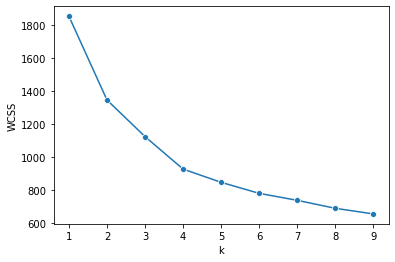

In [111]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

It looks like 4 clusters may be the ideal amount

## Make a scatter plot to illustrate data

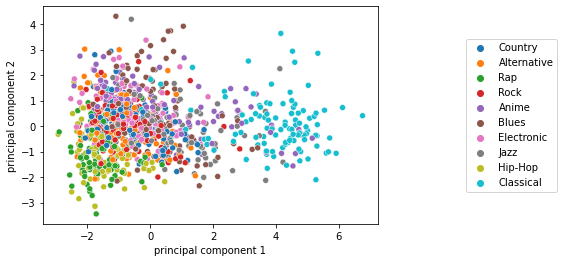

In [113]:
g = sns.scatterplot(data = copyPCA,x = 'principal component 1',y = 'principal component 2' ,hue = "genres")

# prin_comp = pd.DataFrame(data = pca_2_result, columns = ['principal component 1', 'principal component 2'])



# copyPCA = prin_comp.copy()
# copyPCA['genres'] = x1['music_genre'].values

g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

#sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size")

#0 popularity
#1 acousticness *
#2 danceability $
#3 duration_ms
#4 energy *
#5 instrummentalness $
#6 liveness
#7 loudness
#8 speechiness 
#9 tempo

plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

## Run the k-Algortihim and Plot the clusters

In [114]:
k = 4
centroids, cluster = kmeans1(X, k)

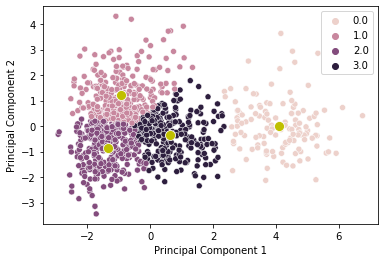

In [123]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

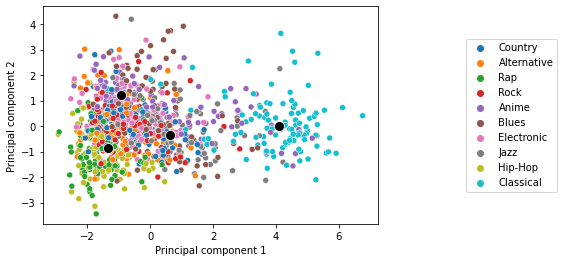

In [122]:
g = sns.scatterplot(data = copyPCA,x = 'principal component 1',y = 'principal component 2' ,hue = "genres")
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='black')

g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

In [116]:
copy_df = copyPCA.copy()

copy_df['labels'] = cluster

extracted_col = x1["music_genre"]

copy_df['genres'] = extracted_col.values

# x_pand['music_genres'] = extracted_col.values
copy_df



,principal component 1,principal component 2,genres,labels
0,-0.612254,-0.673774,Country,2.0
1,0.004362,1.116081,Alternative,1.0
2,-2.012926,-2.287576,Rap,2.0
3,-0.969818,-1.005702,Country,2.0
4,-1.174406,-0.911991,Rock,2.0
...,...,...,...,...
995,-1.122686,-1.559352,Rap,2.0
996,0.331477,1.645302,Classical,1.0
997,-0.112135,1.451961,Electronic,1.0
998,0.077754,0.744729,Anime,1.0


## Counts and analysis
Below is the table of the counts

In [117]:
c_cf = copy_df.copy()
new_df = pd.DataFrame()


new_df['Counts'] = pd.DataFrame(c_cf[["genres", "labels"]].value_counts(sort = True,))
new_df['Norm'] = pd.DataFrame(c_cf[["genres", "labels"]].value_counts(normalize = True))


new_df2 =  new_df.reset_index(level=['labels', 'genres'])

new_df2

# Sort the rows of dataframe by 'Name' column
genres = new_df2.sort_values(by = 'genres')

labels = new_df2.sort_values(by = 'labels')

#uncomment belove to get the count of clusters sorted by genres

#genres.to_csv("genre_counts.csv")
#labels.to_csv("genre_counts.csv")

genres

,genres,labels,Counts,Norm
17,Alternative,3.0,25,0.025
8,Alternative,2.0,41,0.041
14,Alternative,1.0,33,0.033
31,Anime,2.0,2,0.002
3,Anime,1.0,60,0.060
20,Anime,0.0,18,0.018
18,Anime,3.0,24,0.024
30,Blues,0.0,4,0.004
5,Blues,1.0,53,0.053
6,Blues,3.0,42,0.042


In [118]:
labels

,genres,labels,Counts,Norm
0,Classical,0.0,92,0.092
30,Blues,0.0,4,0.004
24,Jazz,0.0,11,0.011
20,Anime,0.0,18,0.018
34,Rock,0.0,1,0.001
35,Electronic,0.0,1,0.001
3,Anime,1.0,60,0.060
25,Rap,1.0,10,0.010
21,Jazz,1.0,12,0.012
5,Blues,1.0,53,0.053
